In [2]:
# pip install seaborn

Importando as bibliotecas

In [3]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
# from bancodados.regiao import regiao
# from bancodados.estados import estados
# from bancodados.municipios import municipios

Definindo as URL - Direetório dos arquivos csv a utilizar

In [4]:
URL_ARQUIVO = "./bancodados/202212.csv"
URL_ARQUIVO_HISTORICO = "./bancodados/HISTORICO_PLANOS.csv"
URL_ARQUIVO_GEOGRAFICO = "./bancodados/geografia.csv"
URL_ARQUIVO_LAT_LONG = "./bancodados/latitude-longitude-cidades.csv"
DATA_BASE = 2023

Abrindo o arquivo '202212.csv' com os dados de venda do plano de Saúde

E exibindo a tabela com todos os dados existentes

In [5]:
tabela_vendas = pd.read_csv(URL_ARQUIVO, delimiter=';', skiprows=lambda x: x > 0 and random.random() >= 0.05)

tabela_vendas

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM
0,110001,1329163,4,"386,36"
1,110001,1329163,7,"552,37"
2,110001,1329553,4,"675,13"
3,110001,1329556,9,"1311,77"
4,110001,1329581,9,"1803,95"
...,...,...,...,...
3989202,530010,18585342,2,"237,0"
3989203,530010,18585362,10,"1500,87"
3989204,530010,18585372,5,"3422,91"
3989205,530010,18610157,3,"77,27"


Abrindo o banco de dados historicxo de planos, utilizado para pegar apenas os planos ativos

In [6]:
tabela_historico = pd.read_csv(URL_ARQUIVO_HISTORICO, sep=",", low_memory=False)

tabela_historico_simplificado = tabela_historico[['ID_PLANO', 'DT_FIM_STATUS', 'DE_SITUACAO_PRINCIPAL']]

tabela_historico_simplificado

,ID_PLANO,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL
0,1324729,11/10/2006,ATIVO
1,1324729,NaN,CANCELADO
2,1324732,11/10/2006,ATIVO
3,1324732,NaN,CANCELADO
4,1324735,11/10/2006,ATIVO
...,...,...,...
315998,18684568,NaN,ATIVO
315999,18684579,NaN,ATIVO
316000,18684589,NaN,ATIVO
316001,18684599,NaN,ATIVO


Filtrar apenas planos ativos

In [7]:
tabela_merge_historico = pd.merge(tabela_vendas, tabela_historico_simplificado, how='left', on='ID_PLANO').dropna()

tabela_merge_historico = tabela_merge_historico[tabela_merge_historico['DT_FIM_STATUS'].str.slice(6).astype(int) < DATA_BASE]

tabela_merge_historico = tabela_merge_historico[tabela_merge_historico['DE_SITUACAO_PRINCIPAL'] == 'ATIVO']

tabela_merge_historico['VCM'] = tabela_merge_historico['VCM'].str.replace(',', '.').astype(float)

tabela_merge_historico

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL
2,110001,1329553,4,675.13,11/08/2014,ATIVO
12,110001,1332115,10,967.79,05/07/2019,ATIVO
15,110001,1332119,6,480.59,05/07/2019,ATIVO
18,110001,1332127,6,1658.60,05/07/2019,ATIVO
21,110001,1332127,9,2341.12,05/07/2019,ATIVO
...,...,...,...,...,...,...
7767685,530010,18168908,8,2042.73,30/06/2022,ATIVO
7767688,530010,18168988,8,5211.21,16/09/2022,ATIVO
7767727,530010,18215413,8,2296.30,26/08/2022,ATIVO
7767745,530010,18240954,9,1816.77,30/06/2022,ATIVO


Abrindo o banco de dados gerografico, utilizado para indicar o 'CD_MUNICIPIO' na tabela de vendas

In [8]:
tabela_geografica = pd.read_csv(URL_ARQUIVO_GEOGRAFICO, sep=";")

tabela_geografica_simplificada = tabela_geografica[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SG_UF', 'NM_REGIAO']]

tabela_geografica_simplificada


,CD_MUNICIPIO,NM_MUNICIPIO,SG_UF,NM_REGIAO
0,330360,Paracambi,RJ,Sudeste
1,330370,Paraíba do Sul,RJ,Sudeste
2,330380,Paraty,RJ,Sudeste
3,315210,Ponte Nova,MG,Sudeste
4,315213,Ponto Chique,MG,Sudeste
...,...,...,...,...
5565,421265,Pescaria Brava,SC,Sul
5566,150475,Mojuí dos Campos,PA,Norte
5567,422000,Balneário Rincão,SC,Sul
5568,431454,Pinto Bandeira,RS,Sul


Realizando a junção dos dois bancos de dados através do 'CD_MUNICIPIO'

In [9]:
tabela_merge = pd.merge(tabela_merge_historico, tabela_geografica_simplificada, how='inner', on='CD_MUNICIPIO')

tabela_merge

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL,NM_MUNICIPIO,SG_UF,NM_REGIAO
0,110001,1329553,4,675.13,11/08/2014,ATIVO,Alta Floresta D'Oeste,RO,Norte
1,110001,1332115,10,967.79,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte
2,110001,1332119,6,480.59,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte
3,110001,1332127,6,1658.60,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte
4,110001,1332127,9,2341.12,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte
...,...,...,...,...,...,...,...,...,...
1517138,530010,18168908,8,2042.73,30/06/2022,ATIVO,Brasília,DF,Centro-Oeste
1517139,530010,18168988,8,5211.21,16/09/2022,ATIVO,Brasília,DF,Centro-Oeste
1517140,530010,18215413,8,2296.30,26/08/2022,ATIVO,Brasília,DF,Centro-Oeste
1517141,530010,18240954,9,1816.77,30/06/2022,ATIVO,Brasília,DF,Centro-Oeste


*Descrisão da tabela*


In [10]:
tabela_merge.info()

tabela_merge.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517143 entries, 0 to 1517142
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CD_MUNICIPIO           1517143 non-null  int64  
 1   ID_PLANO               1517143 non-null  int64  
 2   CD_FAIXA_ETARIA        1517143 non-null  int64  
 3   VCM                    1517143 non-null  float64
 4   DT_FIM_STATUS          1517143 non-null  object 
 5   DE_SITUACAO_PRINCIPAL  1517143 non-null  object 
 6   NM_MUNICIPIO           1517143 non-null  object 
 7   SG_UF                  1517143 non-null  object 
 8   NM_REGIAO              1517143 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 104.2+ MB


,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM
count,1.517143e+06,1.517143e+06,1.517143e+06,1.517143e+06
mean,3.268231e+05,1.498152e+07,5.501947e+00,1.166887e+03
std,9.646304e+04,4.603936e+06,2.871213e+00,1.056501e+03
min,1.100010e+05,1.329553e+06,1.000000e+00,2.093000e+01
25%,2.516700e+05,1.619828e+07,3.000000e+00,5.080800e+02
50%,3.153000e+05,1.634633e+07,5.000000e+00,8.382900e+02
75%,4.117270e+05,1.659624e+07,8.000000e+00,1.451390e+03
max,5.300100e+05,1.849861e+07,1.000000e+01,1.690105e+04


Visualizando os dados da tabela - A distribuição dos planos vendidos

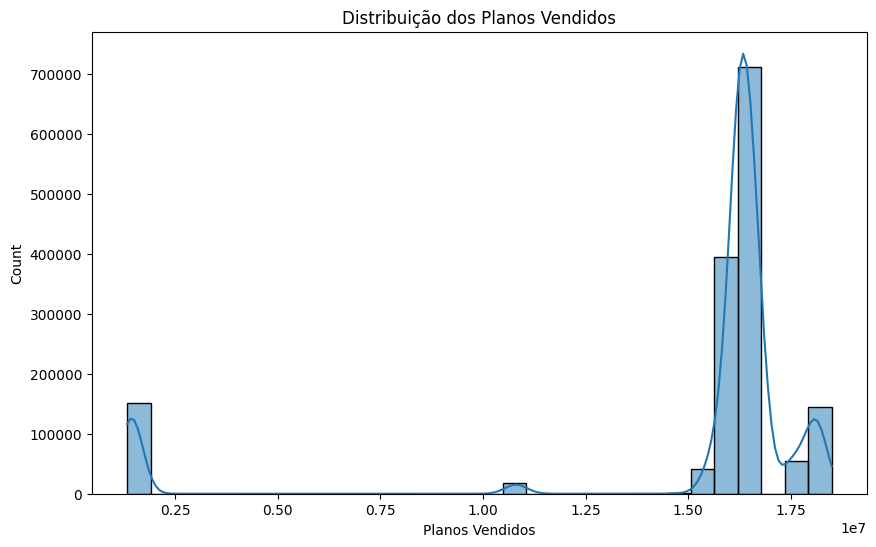

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(tabela_merge['ID_PLANO'], bins=30, kde=True)
plt.title('Distribuição dos Planos Vendidos')
plt.xlabel('Planos Vendidos')
plt.show()

Visualizando os dados da tabela - A distribuição dos valores de mensalidade

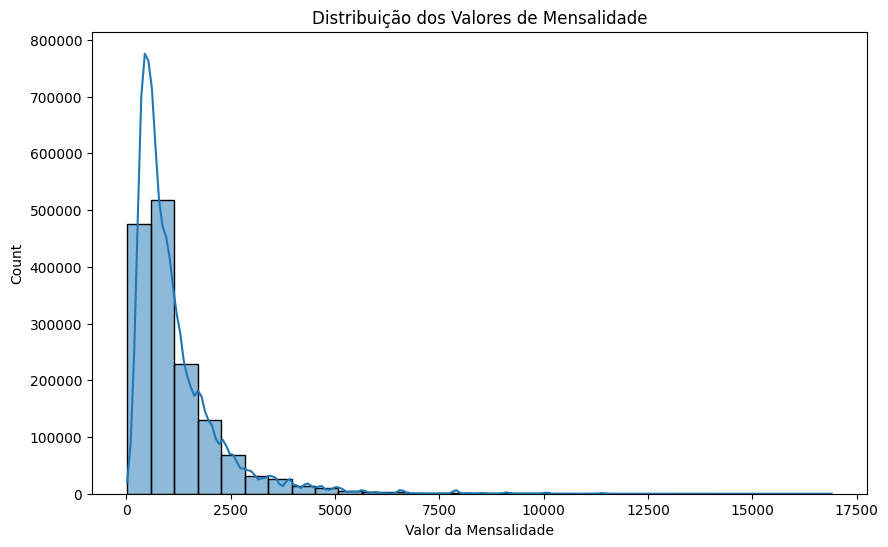

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(tabela_merge['VCM'], bins=30, kde=True)
plt.title('Distribuição dos Valores de Mensalidade')
plt.xlabel('Valor da Mensalidade')
plt.show()

Visualizando os dados da tabela - A distribuição das faixa de idade

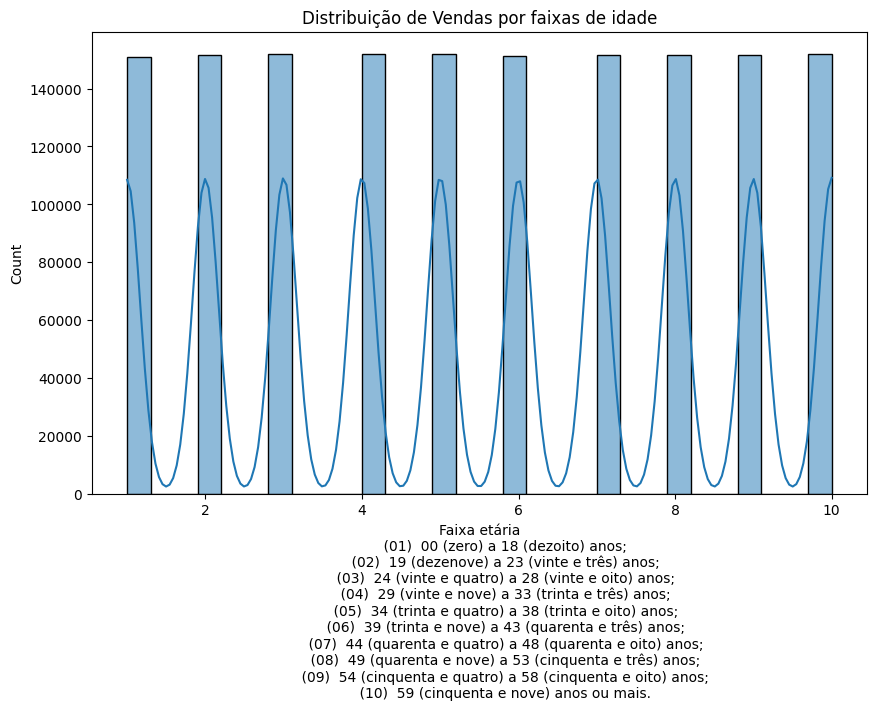

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(tabela_merge['CD_FAIXA_ETARIA'], bins=30, kde=True)
plt.title('Distribuição de Vendas por faixas de idade')
plt.xlabel("""Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.""")
plt.show()

Visualizando os dados da tabela - A distribuição das vendas pelas regiões do Brasil

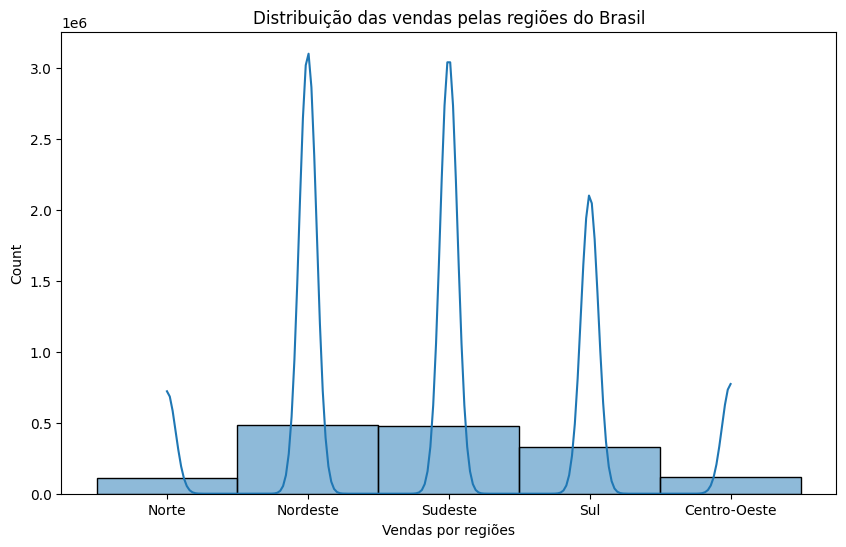

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(tabela_merge['NM_REGIAO'], bins=30, kde=True)
plt.title('Distribuição das vendas pelas regiões do Brasil')
plt.xlabel('Vendas por regiões')
plt.show()

Visualizando os dados da tabela - A distribuição das vendas pelos estados brasileiros

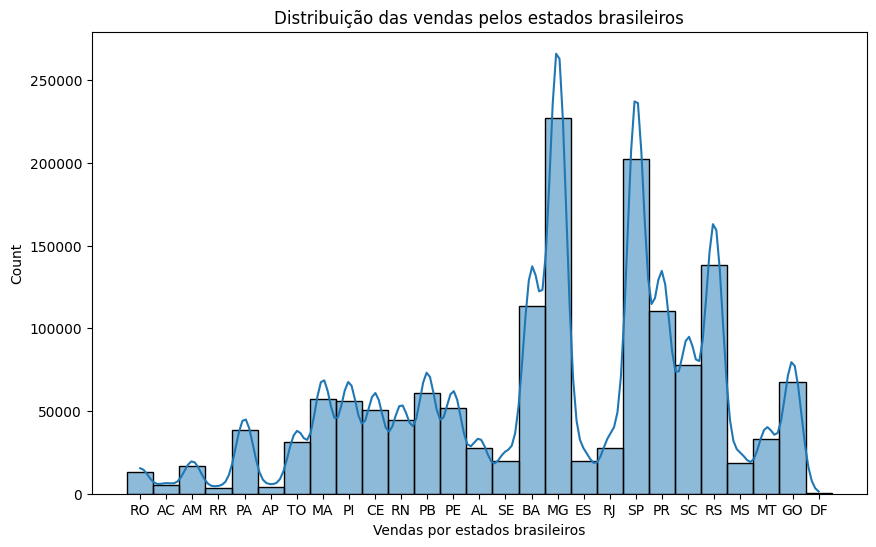

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(tabela_merge['SG_UF'], bins=30, kde=True)
plt.title('Distribuição das vendas pelos estados brasileiros')
plt.xlabel('Vendas por estados brasileiros')
plt.show()

Visualizando os dados da tabela - A distribuição das Tipo do plano x Valores da mensalidade

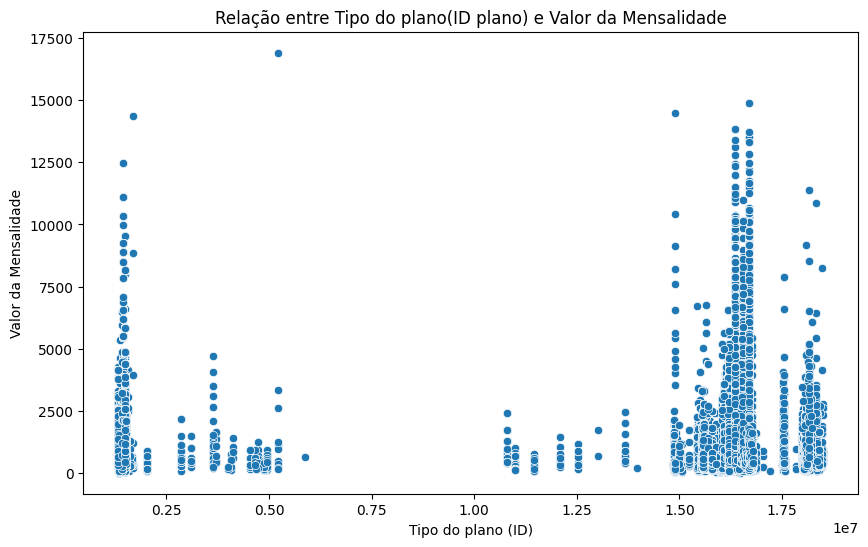

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ID_PLANO', y='VCM', data=tabela_merge)
plt.title('Relação entre Tipo do plano(ID plano) e Valor da Mensalidade')
plt.xlabel('Tipo do plano (ID)')
plt.ylabel('Valor da Mensalidade')
plt.show()

Visualizando os dados da tabela - A distribuição das Faixa etária x Tipo do plano

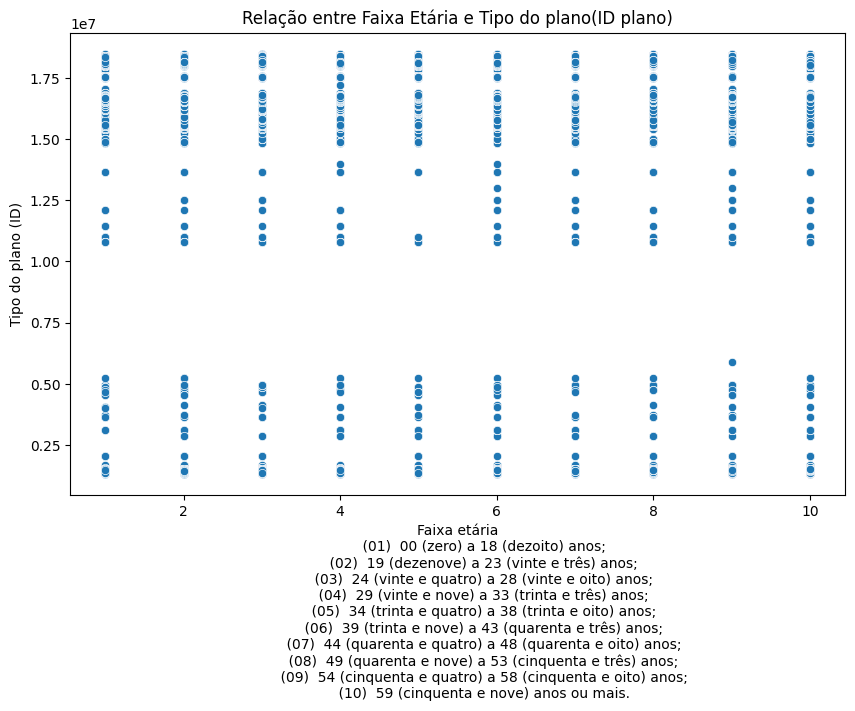

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CD_FAIXA_ETARIA', y='ID_PLANO', data=tabela_merge)
plt.title('Relação entre Faixa Etária e Tipo do plano(ID plano)')
plt.xlabel("""Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.""")
plt.ylabel('Tipo do plano (ID)')
plt.show()

Visualizando os dados da tabela - A distribuição das Tipo do plano x Regiões brasileiras e Estados brasileiros

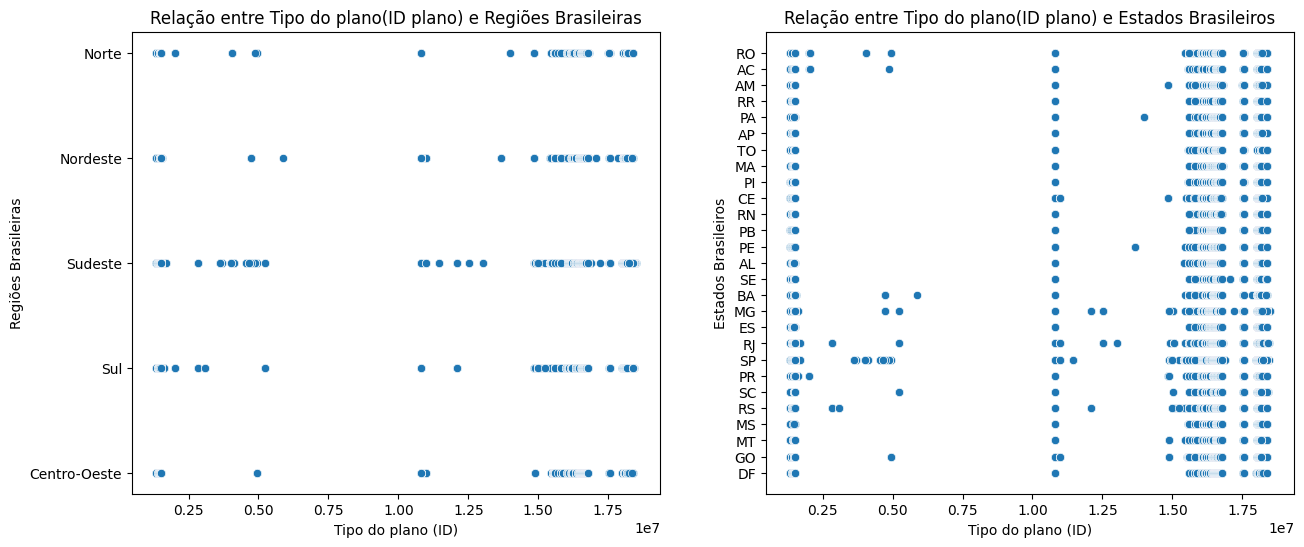

In [18]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='ID_PLANO', y='NM_REGIAO', data=tabela_merge)
plt.title('Relação entre Tipo do plano(ID plano) e Regiões Brasileiras')
plt.xlabel('Tipo do plano (ID)')
plt.ylabel('Regiões Brasileiras')
plt.subplot(1, 2, 2)
sns.scatterplot(x='ID_PLANO', y='SG_UF', data=tabela_merge)
plt.title('Relação entre Tipo do plano(ID plano) e Estados Brasileiros')
plt.xlabel('Tipo do plano (ID)')
plt.ylabel('Estados Brasileiros')
plt.show()

Visualizando os dados da tabela - A distribuição das Faixa etária x Valores da mensalidade

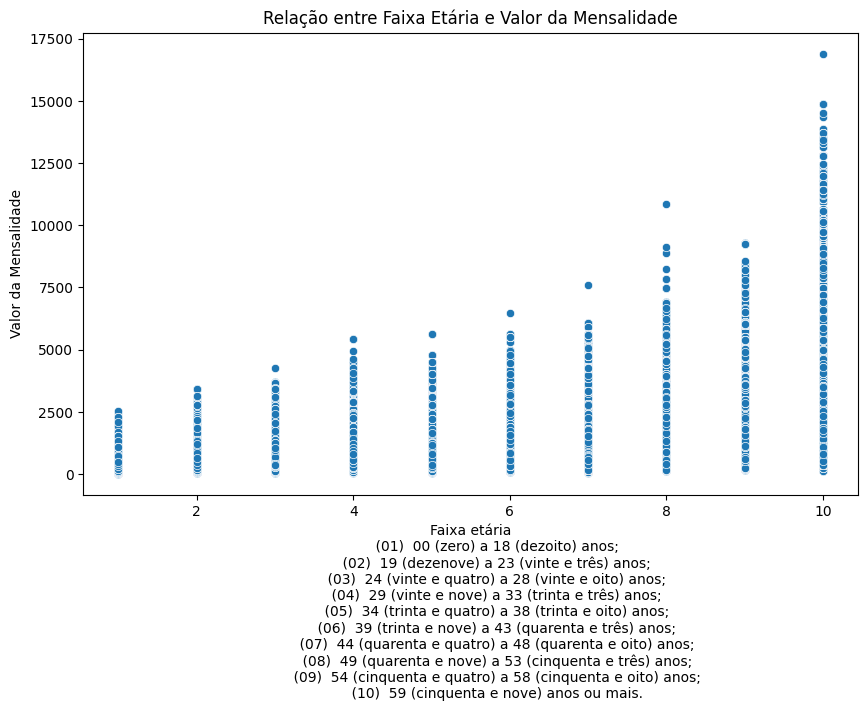

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CD_FAIXA_ETARIA', y='VCM', data=tabela_merge)
plt.title('Relação entre Faixa Etária e Valor da Mensalidade')
plt.xlabel("""Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.""")
plt.ylabel('Valor da Mensalidade')
plt.show()

Visualizando os dados da tabela - A distribuição dos Valores da mensalidade x Regiões brasileiras

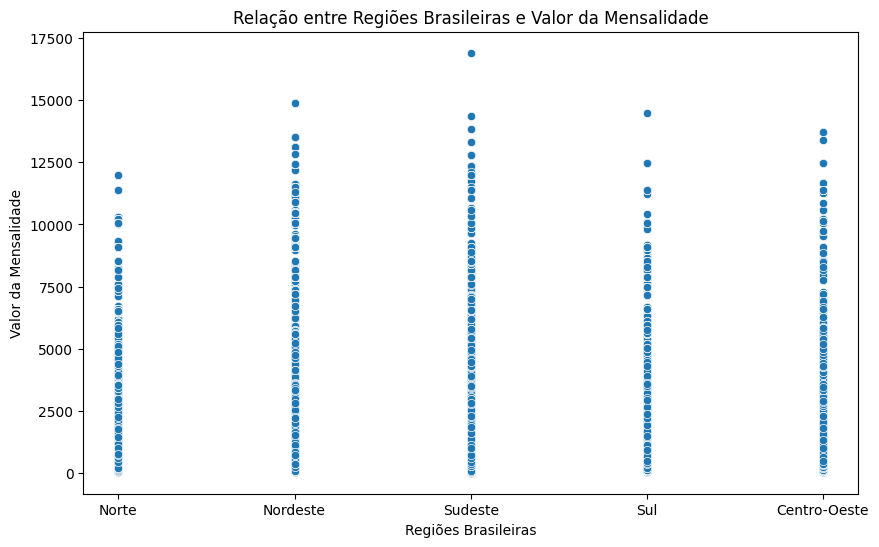

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NM_REGIAO', y='VCM', data=tabela_merge)
plt.title('Relação entre Regiões Brasileiras e Valor da Mensalidade')
plt.xlabel('Regiões Brasileiras')
plt.ylabel('Valor da Mensalidade')
plt.show()

Visualizando os dados da tabela - A distribuição dos Valores da mensalidade x Estados barasileiro

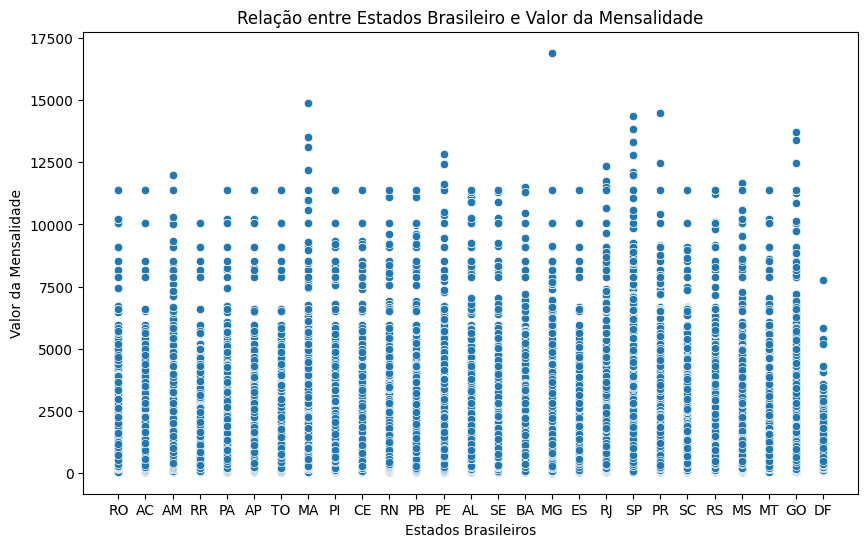

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SG_UF', y='VCM', data=tabela_merge)
plt.title('Relação entre Estados Brasileiro e Valor da Mensalidade')
plt.xlabel('Estados Brasileiros')
plt.ylabel('Valor da Mensalidade')
plt.show()

Visualizando os dados da tabela - A distribuição das Faixa Etária x Regiões brasileiras e Estados brasileiros

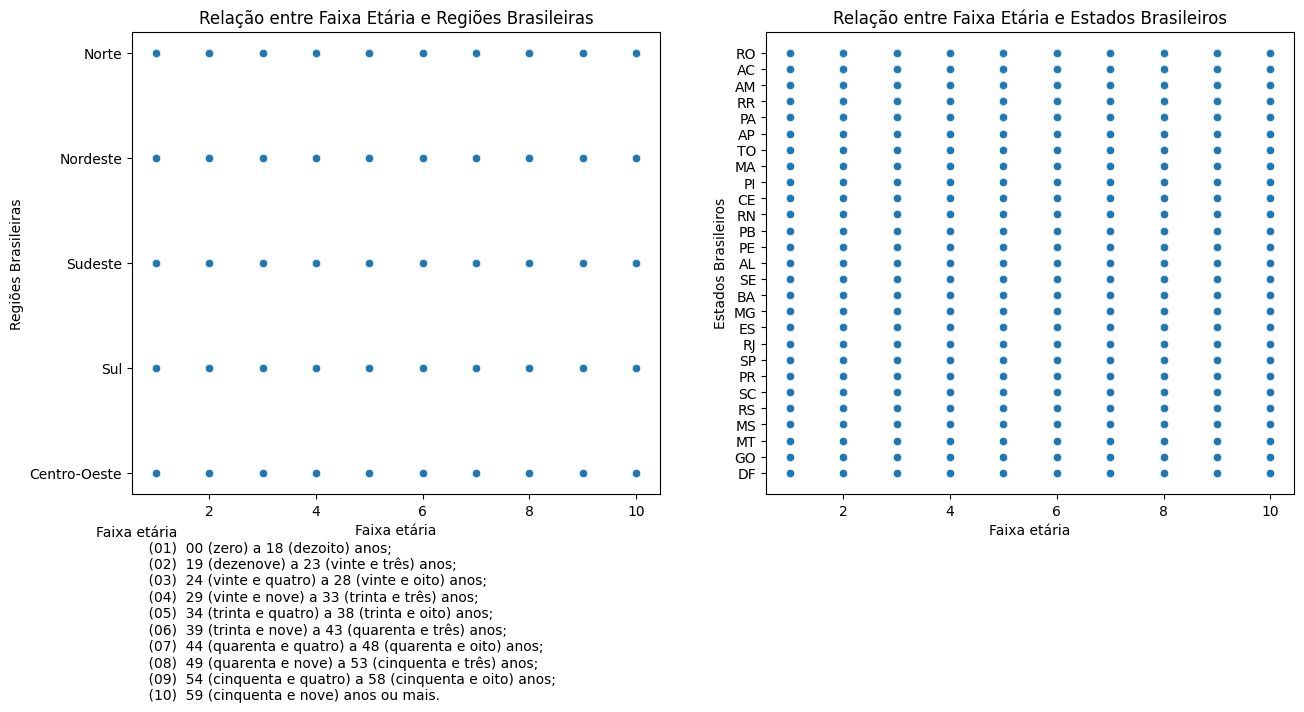

In [22]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='CD_FAIXA_ETARIA', y='NM_REGIAO', data=tabela_merge)
plt.title('Relação entre Faixa Etária e Regiões Brasileiras')
plt.xlabel('Faixa etária')
plt.ylabel('Regiões Brasileiras')
plt.subplot(1, 2, 2)
sns.scatterplot(x='CD_FAIXA_ETARIA', y='SG_UF', data=tabela_merge)
plt.title('Relação entre Faixa Etária e Estados Brasileiros')
plt.xlabel('Faixa etária')
plt.ylabel('Estados Brasileiros')
plt.text(-12, 40,"""Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.""")
plt.show()

Abrindo o arquivo que contem latitudes e logitudes das cidades

In [23]:
tabela_lat_long = pd.read_csv(URL_ARQUIVO_LAT_LONG, delimiter=',')

tabela_lat_long = tabela_lat_long[['NM_MUNICIPIO', 'latitude', 'longitude']]

tabela_lat_long

,NM_MUNICIPIO,latitude,longitude
0,Abadia de Goiás,-16.75730,-49.4412
1,Abadia dos Dourados,-18.48310,-47.3916
2,Abadiânia,-16.19700,-48.7057
3,Abaeté,-19.15510,-45.4444
4,Abaetetuba,-1.72183,-48.8788
...,...,...,...
5565,Xique-Xique,-10.82300,-42.7245
5566,Zabelê,-8.07901,-37.1057
5567,Zacarias,-21.05060,-50.0552
5568,Zé Doca,-3.27014,-45.6553


Merge entre a nova tabela e a tabela com todas as informações

In [29]:
tabela_merge_lat_long = pd.merge(tabela_merge, tabela_lat_long, how='inner', on='NM_MUNICIPIO')

tabela_merge_lat_long

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL,NM_MUNICIPIO,SG_UF,NM_REGIAO,latitude,longitude
0,110001,1329553,4,675.13,11/08/2014,ATIVO,Alta Floresta D'Oeste,RO,Norte,-11.9283,-61.9953
1,110001,1332115,10,967.79,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte,-11.9283,-61.9953
2,110001,1332119,6,480.59,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte,-11.9283,-61.9953
3,110001,1332127,6,1658.60,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte,-11.9283,-61.9953
4,110001,1332127,9,2341.12,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte,-11.9283,-61.9953
...,...,...,...,...,...,...,...,...,...,...,...
1681215,530010,18168908,8,2042.73,30/06/2022,ATIVO,Brasília,DF,Centro-Oeste,-15.7795,-47.9297
1681216,530010,18168988,8,5211.21,16/09/2022,ATIVO,Brasília,DF,Centro-Oeste,-15.7795,-47.9297
1681217,530010,18215413,8,2296.30,26/08/2022,ATIVO,Brasília,DF,Centro-Oeste,-15.7795,-47.9297
1681218,530010,18240954,9,1816.77,30/06/2022,ATIVO,Brasília,DF,Centro-Oeste,-15.7795,-47.9297


Plotando a latitude e logitude com valores da mensalidade

<Axes: xlabel='longitude', ylabel='latitude'>

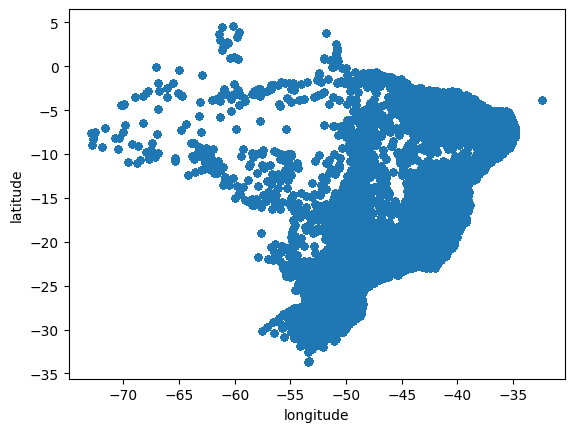

In [25]:
tabela_merge_lat_long.plot(kind='scatter', x='longitude', y='latitude')

Tratando os dados de região, estados e municípios para um dicionário brasil_dict

In [31]:
regiao = tabela_merge_lat_long['NM_REGIAO'].unique()

print('Escolha uma região para analisar')
for r in regiao:
    print(r, end=' ')

Escolha uma região para analisar
Norte Nordeste Sul Sudeste Centro-Oeste 

<Axes: xlabel='longitude', ylabel='latitude'>

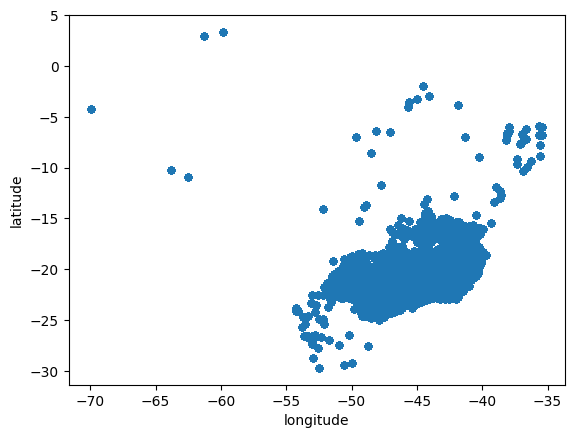

In [40]:
regiao_escolhida = 'Sudeste'
tabela_fitrado_regiao = tabela_merge_lat_long[tabela_merge_lat_long['NM_REGIAO'] == regiao_escolhida]
tabela_fitrado_regiao.plot(kind='scatter', x='longitude', y='latitude')

In [41]:
estados = tabela_fitrado_regiao['SG_UF'].unique()

print('Escolha um estado para analisar')
for e in estados:
    print(e, end=' ')

Escolha uma região para analisar
MG SP RJ ES 

<Axes: xlabel='longitude', ylabel='latitude'>

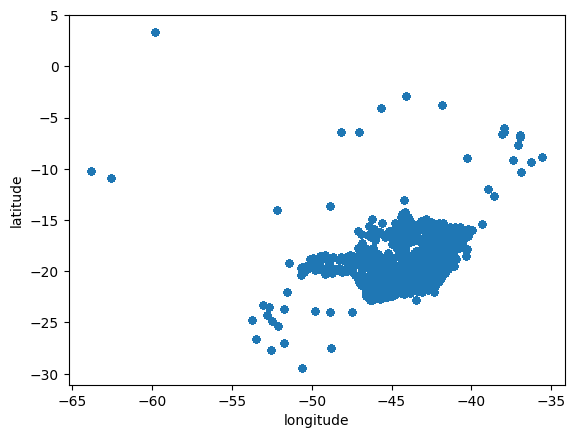

In [42]:
estado_escolhido = 'MG'
tabela_fitrado_estado = tabela_fitrado_regiao[tabela_fitrado_regiao['SG_UF'] == estado_escolhido]
tabela_fitrado_estado.plot(kind='scatter', x='longitude', y='latitude')

In [44]:
municipio = tabela_fitrado_estado['NM_MUNICIPIO'].unique()

print('Escolha um município para analisar')
for m in municipio:
    print(m)

Escolha um município para analisar
Buritis
Nova União
Bonfim
Riachinho
Presidente Juscelino
Santa Luzia
São João do Paraíso
São José do Divino
Ouro Branco
Viçosa
Bom Sucesso
Prata
São Francisco
Lagoa Grande
Campestre
Canápolis
Candeias
Santa Bárbara
Abadia dos Dourados
Abaeté
Abre Campo
Acaiaca
Açucena
Água Boa
Água Comprida
Aguanil
Águas Formosas
Águas Vermelhas
Aimorés
Aiuruoca
Alagoa
Albertina
Além Paraíba
Alfenas
Alfredo Vasconcelos
Almenara
Alpercata
Alpinópolis
Alterosa
Alto Caparaó
Alto Rio Doce
Alvarenga
Alvinópolis
Alvorada de Minas
Amparo do Serra
Andradas
Cachoeira de Pajeú
Andrelândia
Angelândia
Antônio Carlos
Antônio Dias
Antônio Prado de Minas
Araçaí
Aracitaba
Araçuaí
Araguari
Arantina
Araponga
Araporã
Arapuá
Araújos
Araxá
Arceburgo
Arcos
Areado
Argirita
Aricanduva
Arinos
Astolfo Dutra
Ataléia
Augusto de Lima
Baependi
Baldim
Bambuí
Bandeira
Bandeira do Sul
Barão de Cocais
Barão de Monte Alto
Barbacena
Barra Longa
Barroso
Bela Vista de Minas
Belmiro Braga
Belo Horizonte
Be

<Axes: xlabel='longitude', ylabel='latitude'>

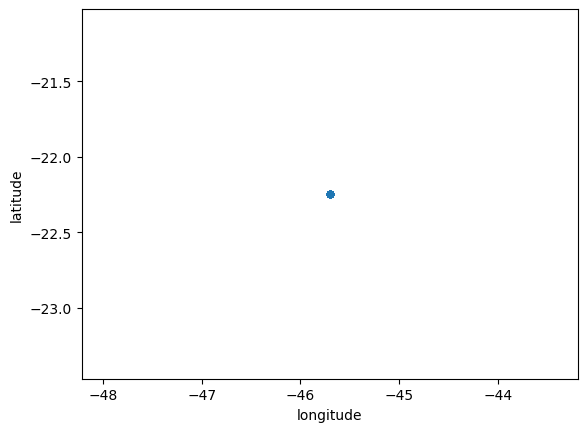

In [70]:
municipio_escolhido = 'Santa Rita do Sapucaí'
tabela_fitrado_municipio = tabela_fitrado_estado[tabela_fitrado_estado['NM_MUNICIPIO'] == municipio_escolhido]
tabela_fitrado_municipio.plot(kind='scatter', x='longitude', y='latitude')

Município analisado: Santa Rita do Sapucaí - MG - Sudeste
         
         Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.


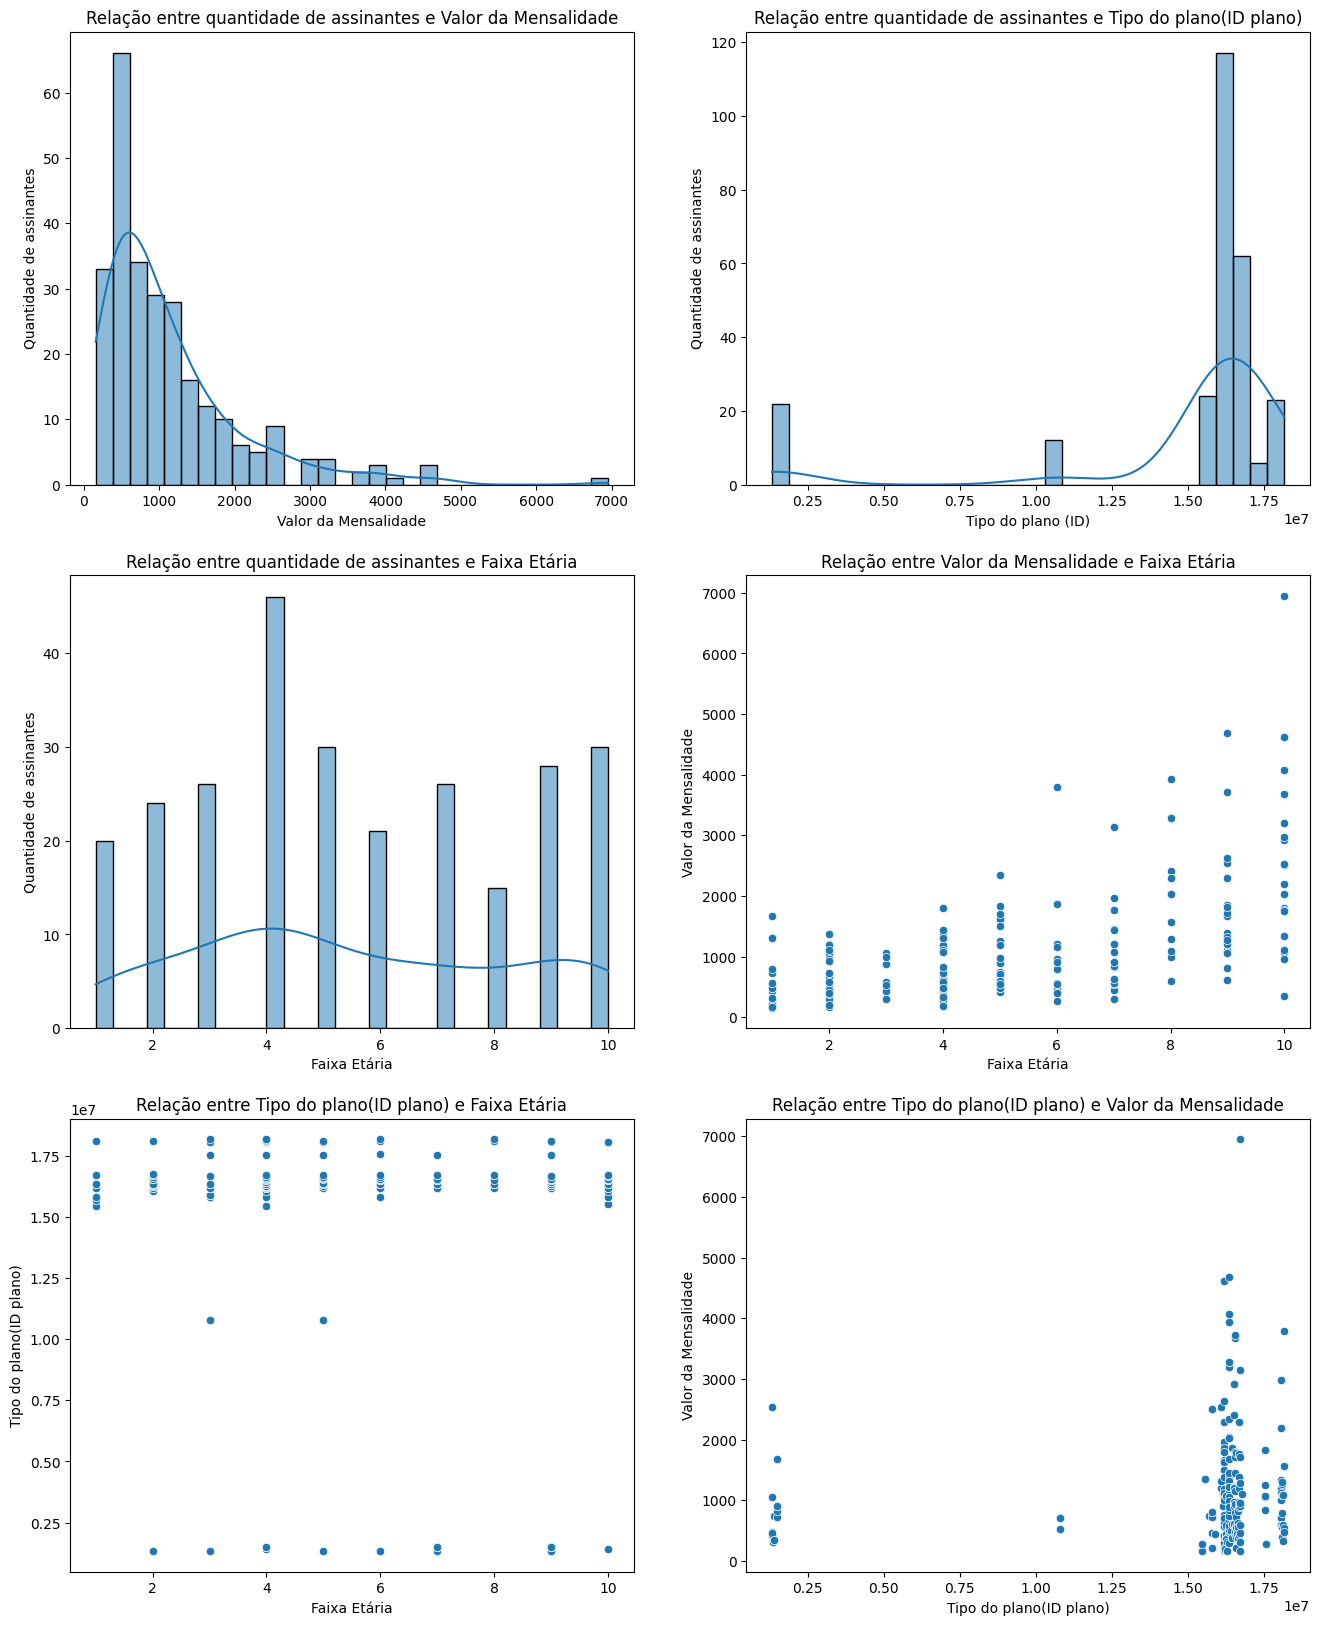

In [110]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 1)
sns.histplot(tabela_fitrado_municipio['VCM'], bins=30, kde=True)
plt.title('Relação entre quantidade de assinantes e Valor da Mensalidade')
plt.xlabel('Valor da Mensalidade')
plt.ylabel('Quantidade de assinantes')
plt.subplot(3, 2, 2)
sns.histplot(tabela_fitrado_municipio['ID_PLANO'], bins=30, kde=True)
plt.title('Relação entre quantidade de assinantes e Tipo do plano(ID plano)')
plt.xlabel('Tipo do plano (ID)')
plt.ylabel('Quantidade de assinantes')
plt.subplot(3, 2, 3)
sns.histplot(tabela_fitrado_municipio['CD_FAIXA_ETARIA'], bins=30, kde=True)
plt.title('Relação entre quantidade de assinantes e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de assinantes')
plt.subplot(3, 2, 4)
sns.scatterplot(x='CD_FAIXA_ETARIA', y='VCM', data=tabela_fitrado_municipio)
plt.title('Relação entre Valor da Mensalidade e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor da Mensalidade')
plt.subplot(3, 2, 5)
sns.scatterplot(x='CD_FAIXA_ETARIA', y='ID_PLANO', data=tabela_fitrado_municipio)
plt.title('Relação entre Tipo do plano(ID plano) e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Tipo do plano(ID plano)')
plt.subplot(3, 2, 6)
sns.scatterplot(x='ID_PLANO', y='VCM', data=tabela_fitrado_municipio)
plt.title('Relação entre Tipo do plano(ID plano) e Valor da Mensalidade')
plt.xlabel('Tipo do plano(ID plano)')
plt.ylabel('Valor da Mensalidade')
print(f"""Município analisado: {municipio_escolhido} - {estado_escolhido} - {regiao_escolhida}
         
         Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.""")
plt.show()